In [2]:
import torch
import os
import numpy as np
from torchvision import datasets, transforms
from torchvision.utils import save_image
from typing import Tuple, List, Dict, Union, Any, cast, Literal

from zmq import device
from pytorch.dataloader.dl import get_dataloader, FlareEvent
from pytorch.config import SolarConfig
from datetime import datetime, timedelta
from torch.utils.data import DataLoader
import logging

# from mnist.model import VAEMNIST
from pytorch.models.model_d6_layer4_1 import ModelDepth6Layer4
from pytorch.models.model_d6_layer4_1_dropout import ModelDepth6Layer4Dropout, load_from_version


logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

2024-05-20 10:17:18,792 INFO [6736] - Cache path: /home/andries/projects/mai-thesis/src/common/../../data/disk-cache/source-raw


In [3]:
data_path = os.path.join('../../', 'data')
image_path = os.path.join(data_path, 'flare_images_preprocessed')
pl_logs = os.path.join(data_path, 'lightning_logs')
print("data_path: ", data_path)
print("pl_logs: ", pl_logs)

# memory leak fix
num_workers = 0

config: SolarConfig = SolarConfig(
    local_data_path=data_path,
    image_data_path=image_path,
    image_dimension=(6, 512, 512),
    channels_name=["source_19"],
    timedimension_max_timedelta=timedelta(hours=16),
    flare_data_file="valid_flares_10h.pickle",
)
dl, dataset = get_dataloader(config, batch_size=16, num_workers=num_workers, shuffle=False, data_only=True)

2024-05-20 10:17:20,543 INFO [6736] - Loading annotations from ../../data
INFO:pytorch.dataloader.dl:Loading annotations from ../../data


data_path:  ../../data
pl_logs:  ../../data/lightning_logs


In [4]:
## Load model
version = 128
checkpoint_file = "epoch=99-step=38600.ckpt"

model: ModelDepth6Layer4Dropout = load_from_version(pl_logs, dropout=0.0, version=version, checkpoint_file=checkpoint_file)

In [6]:
def plot_from_latent_space(model, random_tensor):
    with torch.no_grad():
        generated = model.decode(random_tensor)
        generated.squeeze_()
    print(generated.shape)

    images_concatenated = torch.cat(generated.unbind(0), dim=1)
    images_np = images_concatenated.numpy()
    print(images_np.shape)

    # shape is torch.Size([6, 512, 512]). Plot 6 images of 512x512
    import matplotlib.pyplot as plt

    plt.figure(figsize=(15,5))
    plt.imshow(images_np, cmap='gray')
    plt.axis('off')
    plt.show()


tensor([[ 0.6726,  1.3486,  1.5212, -0.1863,  0.4245,  0.4992,  1.0087,  1.8101,
         -2.2911, -0.1313, -0.9638,  0.8041, -1.4415,  0.1341,  0.6303, -0.7106,
         -0.2568,  0.4217,  0.3538,  1.6065, -0.1843,  0.7112,  0.2909,  0.1593,
          1.3435, -3.0095,  0.4405, -1.0365, -0.0069, -1.2314, -1.4595,  1.6787]])
torch.Size([6, 512, 512])
(512, 3072)


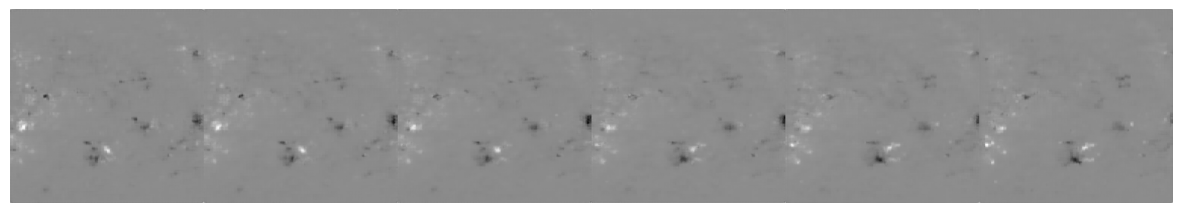

In [7]:
## generate images from random latent space
random_tensor = torch.randn((1, 32))
print(random_tensor)

plot_from_latent_space(model, random_tensor)

tensor([[0.0000, 0.9549, 0.4200, 0.9160, 0.0000, 0.8980, 0.2510, 0.7337, 0.8825,
         0.9258, 0.7561, 0.0018, 0.0000, 0.5597, 0.0517, 0.0000, 0.4323, 0.7734,
         0.6216, 0.0857, 0.6379, 0.0000, 0.6865, 0.3157, 0.7196, 0.8036, 0.8384,
         0.8807, 0.1975, 0.0000, 0.4238, 0.7054]])
torch.Size([6, 512, 512])
(512, 3072)


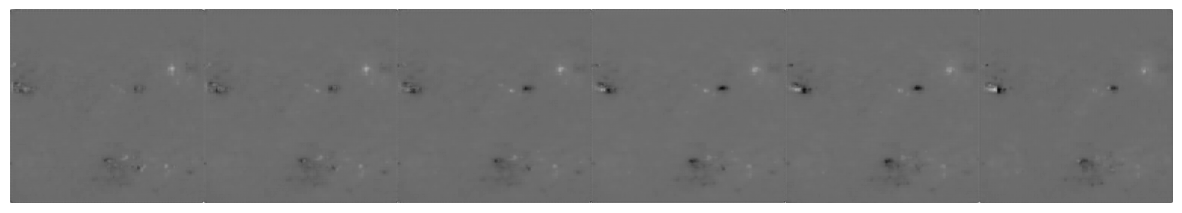

In [28]:
rand_tensor = torch.rand((1, 32))

idx = [12, 29, 15, 21, 0, 4]
for i in idx:
    rand_tensor[0][i] = 0.0

print(rand_tensor)

plot_from_latent_space(model, rand_tensor)